In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics   

In [14]:
data = pd.read_csv('../data/Thyroid_Diff.csv')
data.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [15]:
df = data.copy()

Rename columns

In [16]:
df = df.rename(columns={
    "Age": "age",
    "Gender": "gender",
    "Smoking": "smoking_status",
    "Hx Smoking": "smoking_history",
    "Hx Radiothreapy": "radiotherapy_history",
    "Thyroid Function": "thyroid_function",
    "Physical Examination": "physical_exam",
    "Adenopathy": "adenopathy",
    "Pathology": "pathology",
    "Focality": "focality",
    "Risk": "risk_level",
    "T": "tumor_size_T",
    "N": "lymph_nodes_N",
    "M": "metastasis_M",
    "Stage": "cancer_stage",
    "Response": "treatment_response",
    "Recurred": "recurrence"
})


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking_status        383 non-null    object
 3   smoking_history       383 non-null    object
 4   radiotherapy_history  383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_exam         383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk_level            383 non-null    object
 11  tumor_size_T          383 non-null    object
 12  lymph_nodes_N         383 non-null    object
 13  metastasis_M          383 non-null    object
 14  cancer_stage          383 non-null    object
 15  treatment_response    383 non-null    ob

,age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


Checking null values

In [18]:
print(df.isnull().sum())

age                     0
gender                  0
smoking_status          0
smoking_history         0
radiotherapy_history    0
thyroid_function        0
physical_exam           0
adenopathy              0
pathology               0
focality                0
risk_level              0
tumor_size_T            0
lymph_nodes_N           0
metastasis_M            0
cancer_stage            0
treatment_response      0
recurrence              0
dtype: int64


Cancer stage

In [19]:
df['cancer_stage'].value_counts(normalize=True)

cancer_stage
I      0.869452
II     0.083551
IVB    0.028721
III    0.010444
IVA    0.007833
Name: proportion, dtype: float64

Risk Level

In [20]:
df['risk_level'].value_counts(normalize=True)

risk_level
Low             0.650131
Intermediate    0.266319
High            0.083551
Name: proportion, dtype: float64

Age distribution

In [21]:
df['age'].describe()


count    383.000000
mean      40.866841
std       15.134494
min       15.000000
25%       29.000000
50%       37.000000
75%       51.000000
max       82.000000
Name: age, dtype: float64

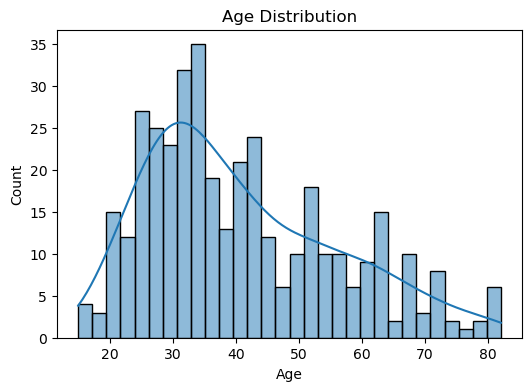

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


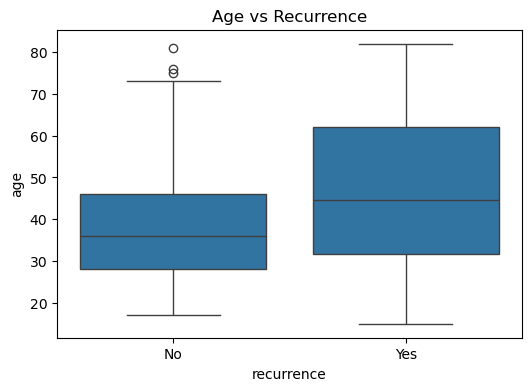

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='recurrence', y='age', data=df)
plt.title("Age vs Recurrence")
plt.show()


In [24]:
def plot_categorical(col):
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()


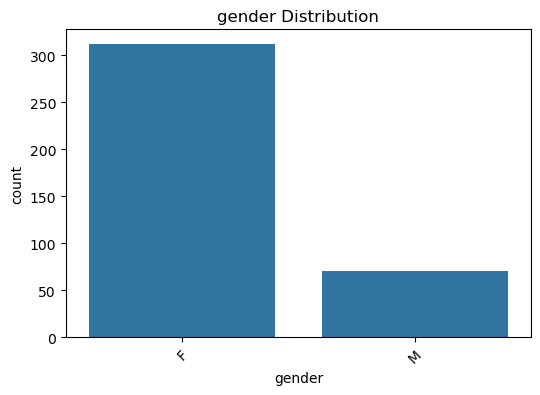

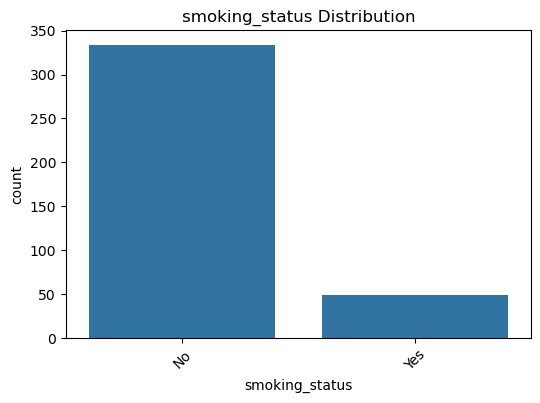

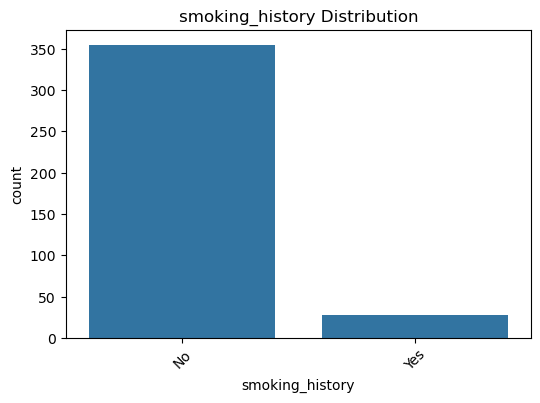

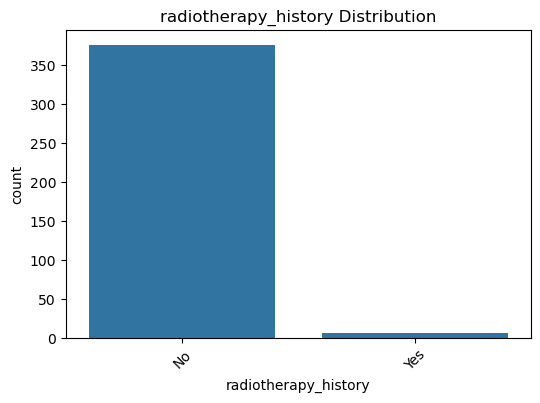

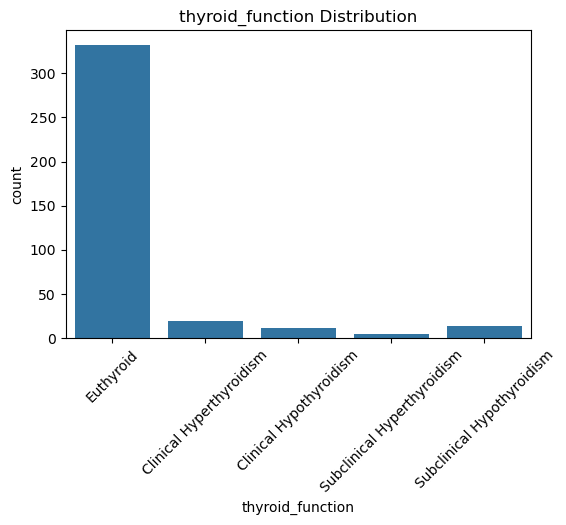

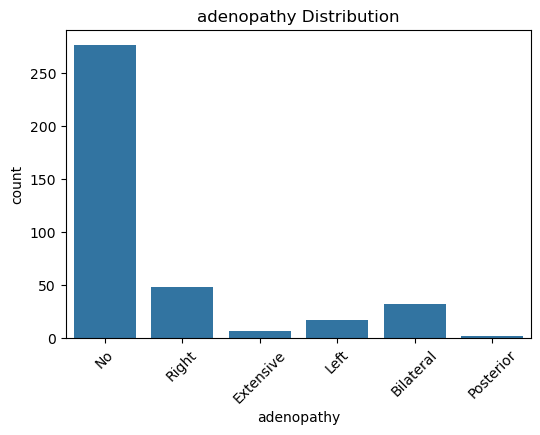

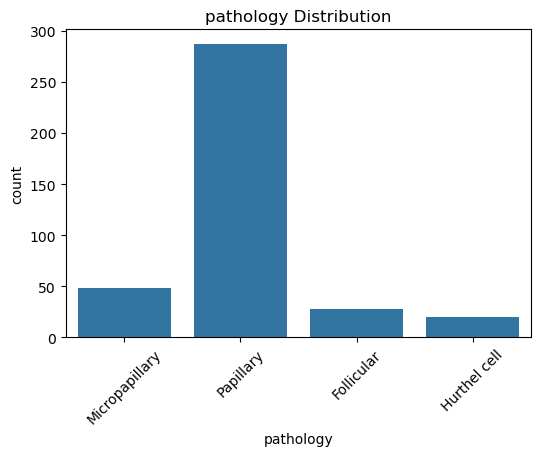

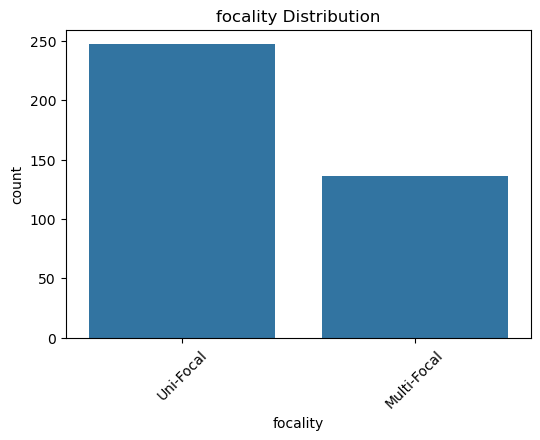

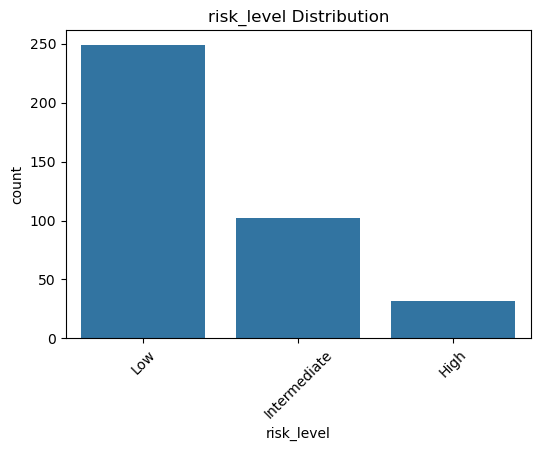

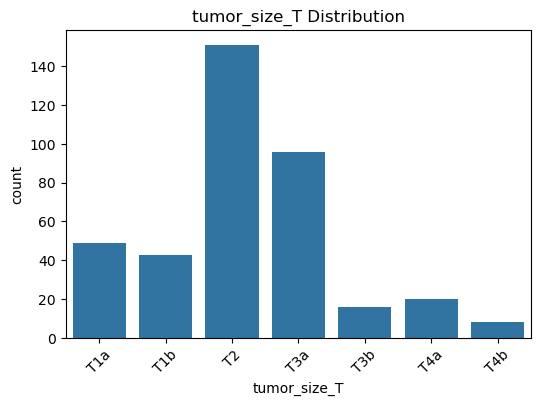

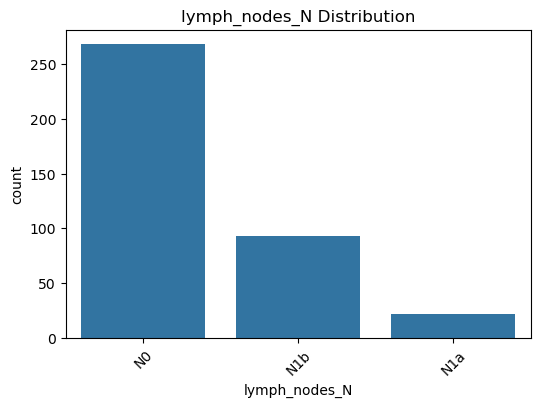

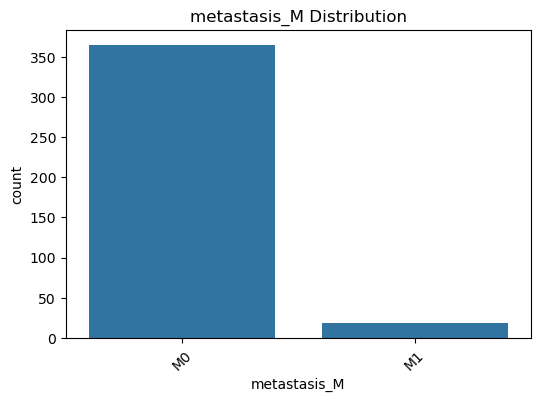

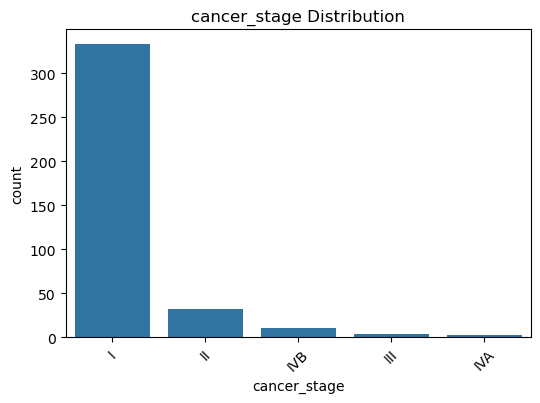

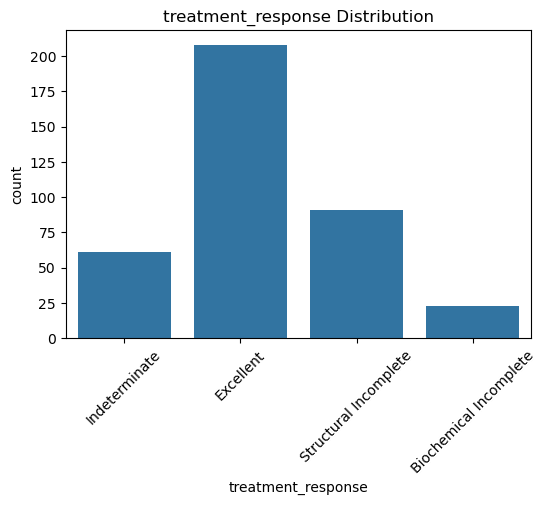

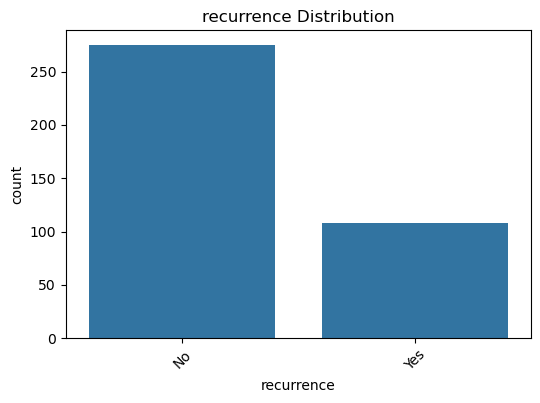

In [25]:
categorical_cols = [
    'gender', 'smoking_status', 'smoking_history',
    'radiotherapy_history', 'thyroid_function',
    'adenopathy', 'pathology', 'focality',
    'risk_level', 'tumor_size_T', 'lymph_nodes_N',
    'metastasis_M', 'cancer_stage', 'treatment_response',
    'recurrence'
]

for col in categorical_cols:
    plot_categorical(col)


In [26]:
df['recurrence'].value_counts()


recurrence
No     275
Yes    108
Name: count, dtype: int64

In [27]:
df['recurrence'].value_counts(normalize=True) * 100


recurrence
No     71.801567
Yes    28.198433
Name: proportion, dtype: float64

Bivariate Analysis

Risk Level vs Recurrence

In [28]:
pd.crosstab(df['risk_level'], df['recurrence'], normalize='index')


recurrence,No,Yes
risk_level,,
High,0.000000,1.000000
Intermediate,0.372549,0.627451
Low,0.951807,0.048193


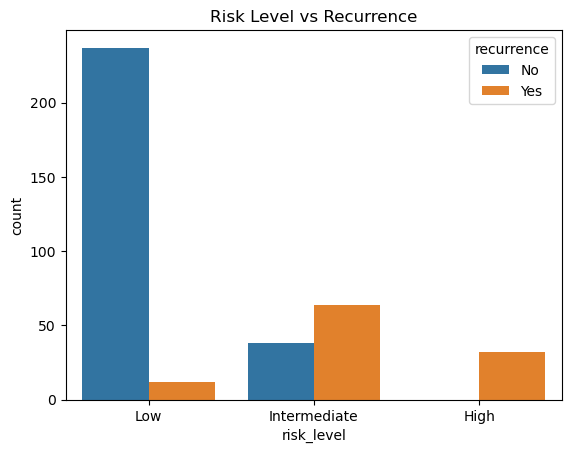

In [29]:
sns.countplot(x='risk_level', hue='recurrence', data=df)
plt.title("Risk Level vs Recurrence")
plt.show()


Cancer Stage vs Recurrence

In [30]:
pd.crosstab(df['cancer_stage'], df['recurrence'], normalize='index')

recurrence,No,Yes
cancer_stage,,
I,0.804805,0.195195
II,0.218750,0.781250
III,0.000000,1.000000
IVA,0.000000,1.000000
IVB,0.000000,1.000000


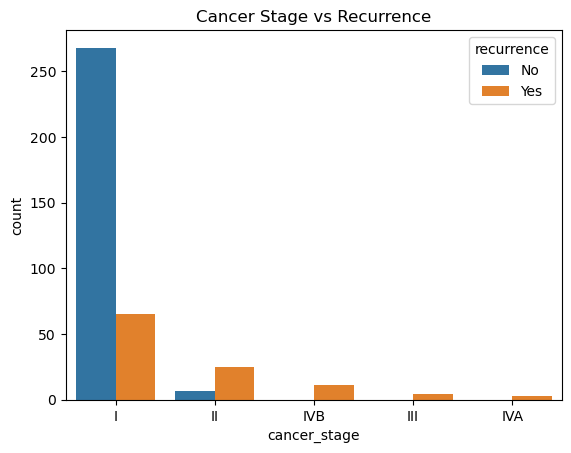

In [31]:
sns.countplot(x='cancer_stage', hue='recurrence', data=df)
plt.title("Cancer Stage vs Recurrence")
plt.show()


Lymph Nodes vs Recurrence

In [32]:
pd.crosstab(df['lymph_nodes_N'], df['recurrence'], normalize='index')

recurrence,No,Yes
lymph_nodes_N,,
N0,0.899254,0.100746
N1a,0.545455,0.454545
N1b,0.236559,0.763441


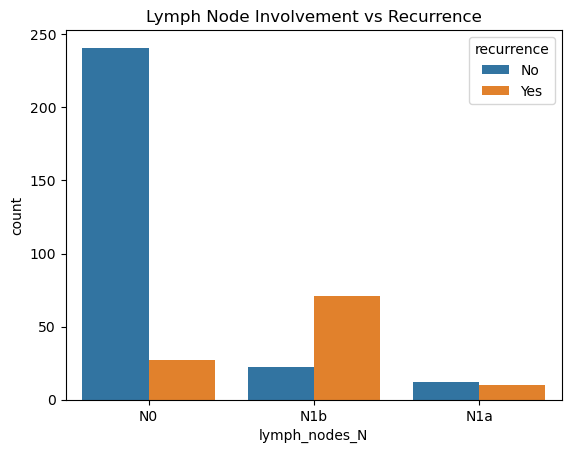

In [33]:
sns.countplot(x='lymph_nodes_N', hue='recurrence', data=df)
plt.title("Lymph Node Involvement vs Recurrence")
plt.show()


Metastasis vs Recurrence

In [34]:
pd.crosstab(df['metastasis_M'], df['recurrence'], normalize='index')


recurrence,No,Yes
metastasis_M,,
M0,0.753425,0.246575
M1,0.000000,1.000000


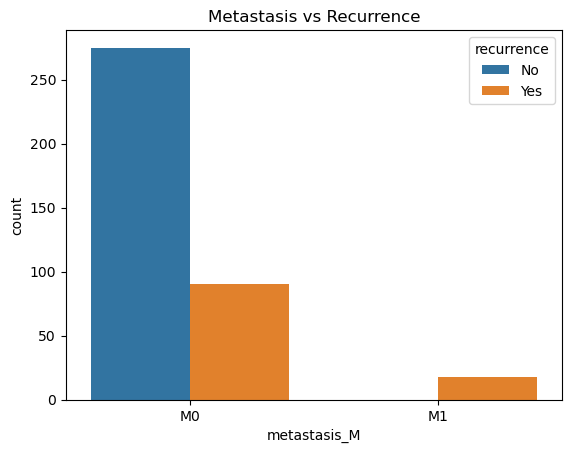

In [35]:
sns.countplot(x='metastasis_M', hue='recurrence', data=df)
plt.title("Metastasis vs Recurrence")
plt.show()


Treatment Response vs Recurrence

In [36]:
pd.crosstab(df['treatment_response'], df['recurrence'], normalize='index')


recurrence,No,Yes
treatment_response,,
Biochemical Incomplete,0.521739,0.478261
Excellent,0.995192,0.004808
Indeterminate,0.885246,0.114754
Structural Incomplete,0.021978,0.978022
